# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [81]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

import plotly.express as px
import plotly.graph_objects as go
from plotly.graph_objs import Layout

In [39]:
ativos = ['^BVSP', 'PBR', 'BBAS3.SA']
dt_ini, dt_fim = '2021-03-01', '2021-07-01'

df = pdr.get_data_yahoo(ativos, start=dt_ini)
df.ffill(inplace=True)
df.info()

[*********************100%***********************]  3 of 3 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 2021-03-01 to 2023-04-03
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, BBAS3.SA)  542 non-null    float64
 1   (Adj Close, PBR)       542 non-null    float64
 2   (Adj Close, ^BVSP)     542 non-null    float64
 3   (Close, BBAS3.SA)      542 non-null    float64
 4   (Close, PBR)           542 non-null    float64
 5   (Close, ^BVSP)         542 non-null    float64
 6   (High, BBAS3.SA)       542 non-null    float64
 7   (High, PBR)            542 non-null    float64
 8   (High, ^BVSP)          542 non-null    float64
 9   (Low, BBAS3.SA)        542 non-null    float64
 10  (Low, PBR)             542 non-null    float64
 11  (Low, ^BVSP)           542 non-null    float64
 12  (Open, BBAS3.SA)       542 non-null    float64
 13  (Open, PBR)           

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [56]:
df_adj = df['Adj Close']
df_adj_rolmean = df_adj.rolling(90).mean()
df_adj_rolmean = df_adj_rolmean.stack().reset_index()
df_adj_rolmean.columns = ['data', 'ativo', 'valor']

,data,ativo,valor
0,2021-07-05,BBAS3.SA,27.165755
1,2021-07-05,PBR,4.836604
2,2021-07-05,^BVSP,121214.355556
3,2021-07-06,BBAS3.SA,27.206680
4,2021-07-06,PBR,4.856779
...,...,...,...
1354,2023-03-31,PBR,10.789222
1355,2023-03-31,^BVSP,107356.222222
1356,2023-04-03,BBAS3.SA,36.570879
1357,2023-04-03,PBR,10.795111


In [57]:
df_adj_rolstd = df_adj.rolling(90).std()
df_adj_rolstd = df_adj_rolstd.stack().reset_index()
df_adj_rolstd.columns = ['data', 'ativo', 'valor']

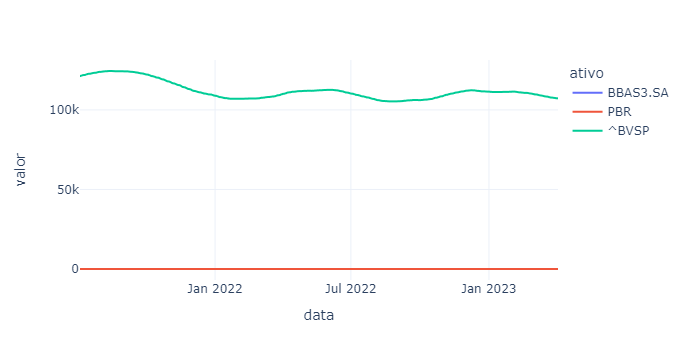

In [67]:
fig = px.line(df_adj_rolmean, x='data', y='valor', color='ativo', template='plotly_white')
fig.show()

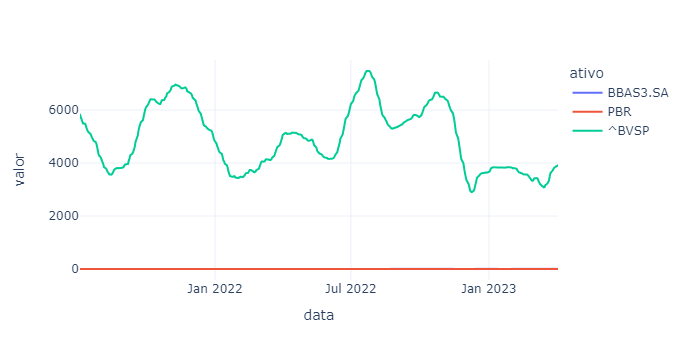

In [68]:
fig = px.line(df_adj_rolstd, x='data', y='valor', color='ativo', template='plotly_white')
fig.show()

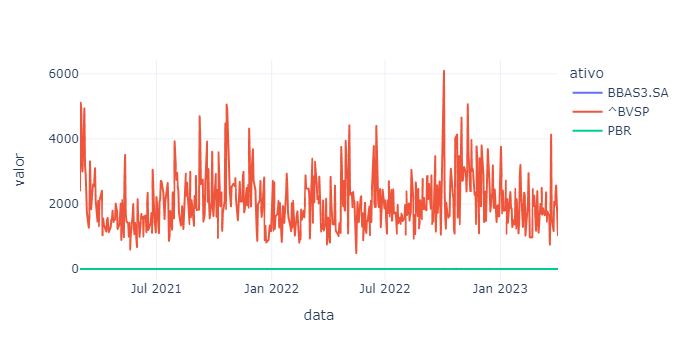

In [61]:
ativo = 'BBAS3.SA'
df_bb = df.copy()
df_bb = (df_bb['High'][ativo] - df_bb['Low'][ativo]).to_frame()


ativo = '^BVSP'
df_bvsp = df.copy()
df_bvsp = (df_bvsp['High'][ativo] - df_bvsp['Low'][ativo]).to_frame()


ativo = 'PBR'
df_pbr = df.copy()
df_pbr = (df_pbr['High'][ativo] - df_pbr['Low'][ativo]).to_frame()

df_amplitude = df_bb.merge(df_bvsp, right_index=True, left_index=True).merge(df_pbr, right_index=True, left_index=True)
df_amplitude = df_amplitude.stack().reset_index()
df_amplitude.columns = ['data', 'ativo', 'valor']

fig = px.line(df_amplitude, x='data' , y='valor', color='ativo', template='plotly_white')
fig.show()

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [76]:
lista_indicadores = ['Close', 'High', 'Low', 'Open']
ativo = ['PBR']*len(lista_indicadores)
colunas = list(zip(lista_indicadores, ativo))
colunas

[('Close', 'PBR'), ('High', 'PBR'), ('Low', 'PBR'), ('Open', 'PBR')]

In [79]:
pbr = df.loc['02/03/2023':,colunas]
pbr.columns = lista_indicadores
pbr

,Close,High,Low,Open
Date,,,,
2023-02-03,10.84,11.120,10.73,10.91
2023-02-06,11.19,11.220,10.71,10.84
2023-02-07,11.05,11.290,10.90,11.20
2023-02-08,11.20,11.290,10.97,11.10
2023-02-09,11.05,11.260,11.03,11.17
2023-02-10,11.53,11.570,11.25,11.30
2023-02-13,11.70,11.720,11.43,11.49
2023-02-14,11.63,11.800,11.52,11.65
2023-02-15,11.62,11.650,11.41,11.52


In [80]:
graph = {
    'x': pbr.index,
    'open': pbr.Open,
    'close': pbr.Close,
    'high': pbr.High,
    'low': pbr.Low,
    'type': 'candlestick',
    'name': 'PBR',
    'showlegend': True
}

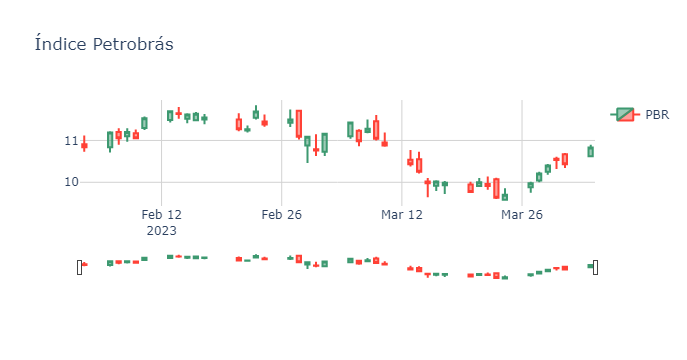

In [82]:


layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

grafico = go.Figure(
    data = [graph],
    layout_title="Índice Petrobrás",
    layout=layout
)
grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

grafico